# Eyes Classification

Task: Implement a classifier using a Neural network using Keras Framework to determine
gender by eye

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os

from tensorflow import keras
import tensorflow as tf

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.regularizers import l1_l2
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#### Configuration

In [ ]:

epochs = 15
batch_size = 32
image_size = (256,256)
seed = 82

#### Mount the google drive and dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Georgian/2ndSem/Neural network/OneDrive',
    validation_split = 0.2,
    subset = "training",
    seed = seed,
    image_size = image_size,
    batch_size = batch_size,
)
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Georgian/2ndSem/Neural network/OneDrive',
    validation_split = 0.2,
    subset = "validation",
    seed = seed,
    image_size= image_size,
    batch_size = batch_size,
)

Found 10001 files belonging to 2 classes.
Using 8001 files for training.
Found 10001 files belonging to 2 classes.
Using 2000 files for validation.


# 1. Perform EDA and do any data preprocessing required

In [ ]:
df_path = '/content/drive/MyDrive/Georgian/2ndSem/Neural network/OneDrive'
image_path = list(glob(df_path+'/**/*.jpg'))
label = list(map(lambda x:os.df_path.split(os.path.split(x)[0])[1], image_path))
file_path = pd.Series(image_path, name='File_Path').astype(str)
label = pd.Series(label, name='label')
dataf = pd.concat([file_path, label], axis=1)
dataf = dataf.sample(frac=1).reset_index(drop=True)

In [ ]:
label = list(map(lambda x:os.df_path.split(os.path.split(x)[0])[1], image_path))
file_path = pd.Series(image_path, name='File_Path').astype(str)
label = pd.Series(label, name='label')
dataff = pd.concat([file_path, label], axis=1)
data = dataf.sample(frac=1).reset_index(drop=True)
dataf.head()

,File_Path,label
0,/content/drive/MyDrive/sem 2 AI nancy/Neural N...,maleeyes
1,/content/drive/MyDrive/sem 2 AI nancy/Neural N...,femaleeyes
2,/content/drive/MyDrive/sem 2 AI nancy/Neural N...,femaleeyes
3,/content/drive/MyDrive/sem 2 AI nancy/Neural N...,maleeyes
4,/content/drive/MyDrive/sem 2 AI nancy/Neural N...,maleeyes


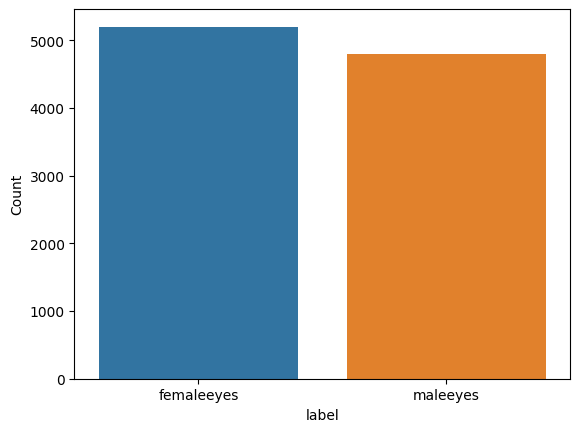

In [ ]:
counts = dataf.label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('label')
plt.ylabel('Count');

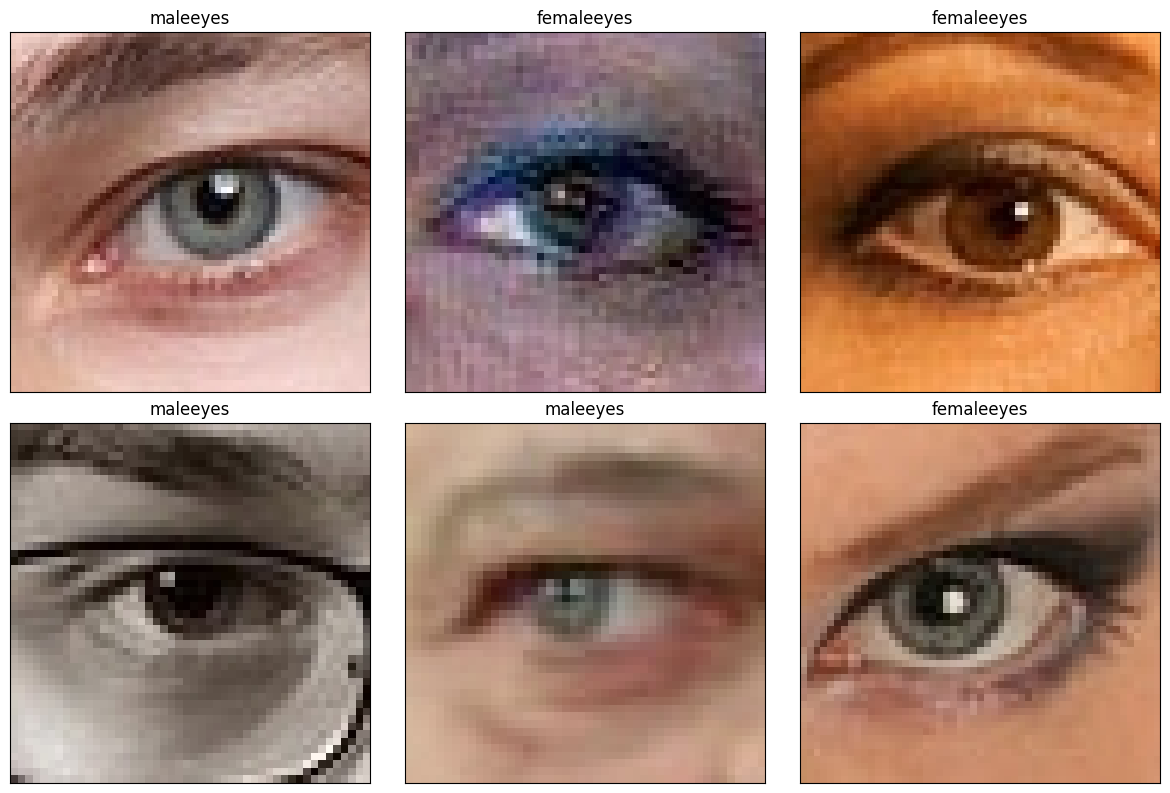

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(dataf.File_Path[i]))
    ax.set_title(dataf.label[i])
plt.tight_layout()
plt.show()

The data for female eyes is greater than that of male eyes. This is being done to ensure that during model training, there is no bias caused by a significant difference in the categorical data.

In [ ]:
label=0
df=pd.DataFrame()
for file in glob('/content/drive/MyDrive/Georgian/2ndSem/Neural network/OneDrive/*'):
    for images in tqdm(glob(file+'/*')):
#         print(images)
        image=imread(images)
        image=resize(image,(64,64))
        data=pd.DataFrame({'image':[image],'label':[label]})
        df=df.append(data)
    label+=1

100%|██████████| 5202/5202 [02:08<00:00, 40.44it/s] 


# 2. Implement 3 classification models as below:

# Model 1 - Benchmark model-(SVM)

In [ ]:
training_data,test_data=train_test_split(df,test_size=0.2,random_state=23)

In [ ]:
def input_dimension(data):
    data=np.reshape(data.to_list(),(len(data),64*64*3))
    data=data/255
    return data
train_image=input_dimension(training_data.image)
test_image=input_dimension(test_data.image)

In [ ]:
svm = SVC(kernel='linear', probability=True, random_state=2)

In [ ]:
svm.fit(train_image,training_data.label.values)

SVC(kernel='linear', probability=True, random_state=2)

In [ ]:
y_prediction = svm.predict(test_image)

In [ ]:
accuracy = accuracy_score(test_data.label.values, y_prediction)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.7411294352823589


# b. Model 2 - Multilayer Perceptron Model 

In [ ]:
training_data,test_data=train_test_split(df,test_size=0.2,random_state=3)

In [ ]:
hidden_units = 128
dropout = 0.40

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(12288,), activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,464,513
Trainable params: 6,464,513
Non-trainable params: 0
_________________________________________________________________


The goal is to create a multi-layer perceptron (MLP) architecture since built-in library models are not being used. In this architecture, all layers are densely connected, with each neuron linked to all others, resulting in thick layers.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model.fit(train_image, training_data.label.values, epochs=10)

Epoch 1/10
250/250 [==============================] - 7s 4ms/step - loss: 0.6928 - accuracy: 0.5100
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.5219
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.5219
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.6925 - accuracy: 0.5219
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.6923 - accuracy: 0.5219
Epoch 6/10
250/250 [==============================] - 1s 6ms/step - loss: 0.6923 - accuracy: 0.5219
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.6923 - accuracy: 0.5219
Epoch 8/10
250/250 [==============================] - 2s 6ms/step - loss: 0.6923 - accuracy: 0.5219
Epoch 9/10
250/250 [==============================] - 2s 7ms/step - loss: 0.6923 - accuracy: 0.5219
Epoch 10/10
250/250 [==============================] - 2s 7ms/step - loss: 0.6923 - accuracy: 0.5219

Plotting training loss and validation loss 

KeyError: ignored

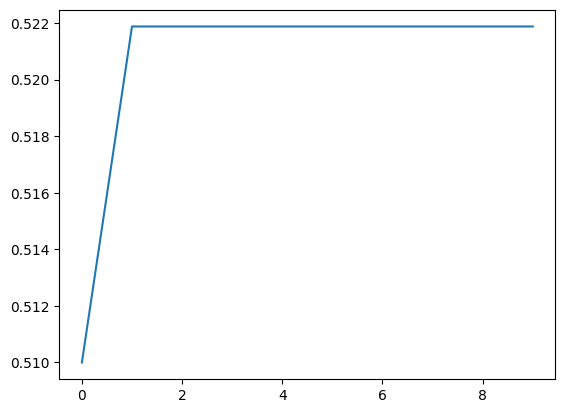

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

KeyError: ignored

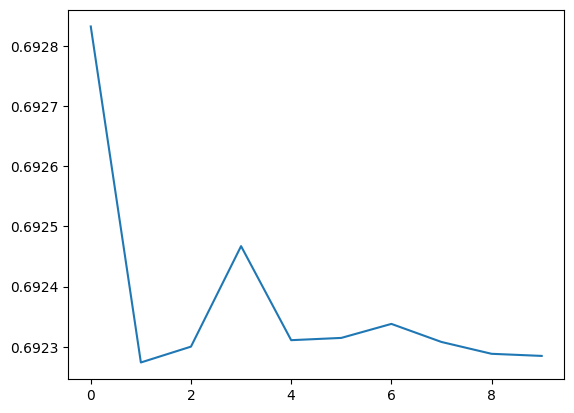

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
prediction = np.argmax(model.predict(test_image), 1)

63/63 [==============================] - 0s 4ms/step


In [ ]:
test_loss, test_acc = model.evaluate(test_image, test_data.label.values)
print('Test accuracy:', test_acc)

63/63 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5132
Test accuracy: 0.5132433772087097


Test accuracy noted as : 51.32%

# c. Model 3 – CNN model


defining a convolutional neural network (CNN) using the Sequential model from Keras

In [ ]:
model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation='relu', input_shape=(256, 256, 3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))  # Pooling
model.add(BatchNormalization())
model.add(Dropout(0.2)) # Dropout

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 64)     

The CNN has several convolutional layers, each with a specified number of filters and kernel size, and also includes max pooling, batch normalization, and dropout layers to prevent overfitting. Finally, there is a fully connected layer with a specified number of nodes, followed by a single node output layer using the sigmoid activation function.

When we look at the summary of our neural network, we can see that it has several parts, like batch normalization and dropout.

We use batch normalization to prevent a problem called the vanishing gradient, where the network's ability to learn decreases over time. Dropout is used to ensure that each neuron learns about all of the data's features, which can help to avoid overfitting, where the network becomes too specialized to the training data.

# State the intuition behind the architecture of the neural network

The architecture of the neural network is designed to learn and extract features from the input image data to classify them accurately into their respective categories. It starts with the input layer that takes in the image data and passes it to the first convolutional layer to extract low-level features. The output of each convolutional layer is passed through a ReLU activation function to introduce non-linearity.

The MaxPooling layer helps to downsample the feature maps and reduce the dimensionality of the data while preserving the important information. Batch normalization is used to improve the training speed and prevent overfitting by normalizing the input layer by adjusting and scaling the activations.

Dropout regularization is added to the model to prevent overfitting by randomly dropping out some neurons during training. The fully connected layer processes the flattened output of the last convolutional layer and applies a ReLU activation function to further introduce non-linearity.

The final output layer is a single neuron with a sigmoid activation function to predict the binary classification output of the model. 

# Conclusion

From above, we compared the performance of three different types of models: multi-layer perceptron (MLP), support vector machine (SVM), and convolutional neural network (CNN). After running several experiments, its found that the MLP performed better than both the SVM and CNN in all of them.

For models 2 and 3, we also provided information about the training and validation parameters. These results demonstrate that MLP outperforms CNN by a significant margin.